## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [3]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [16]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  1937k      0  0:00:41  0:00:41 --:--:-- 2161k


### Get the statistics from the Pickle File

In [4]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [18]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [19]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [20]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    ax = fig.gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b   1'))
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

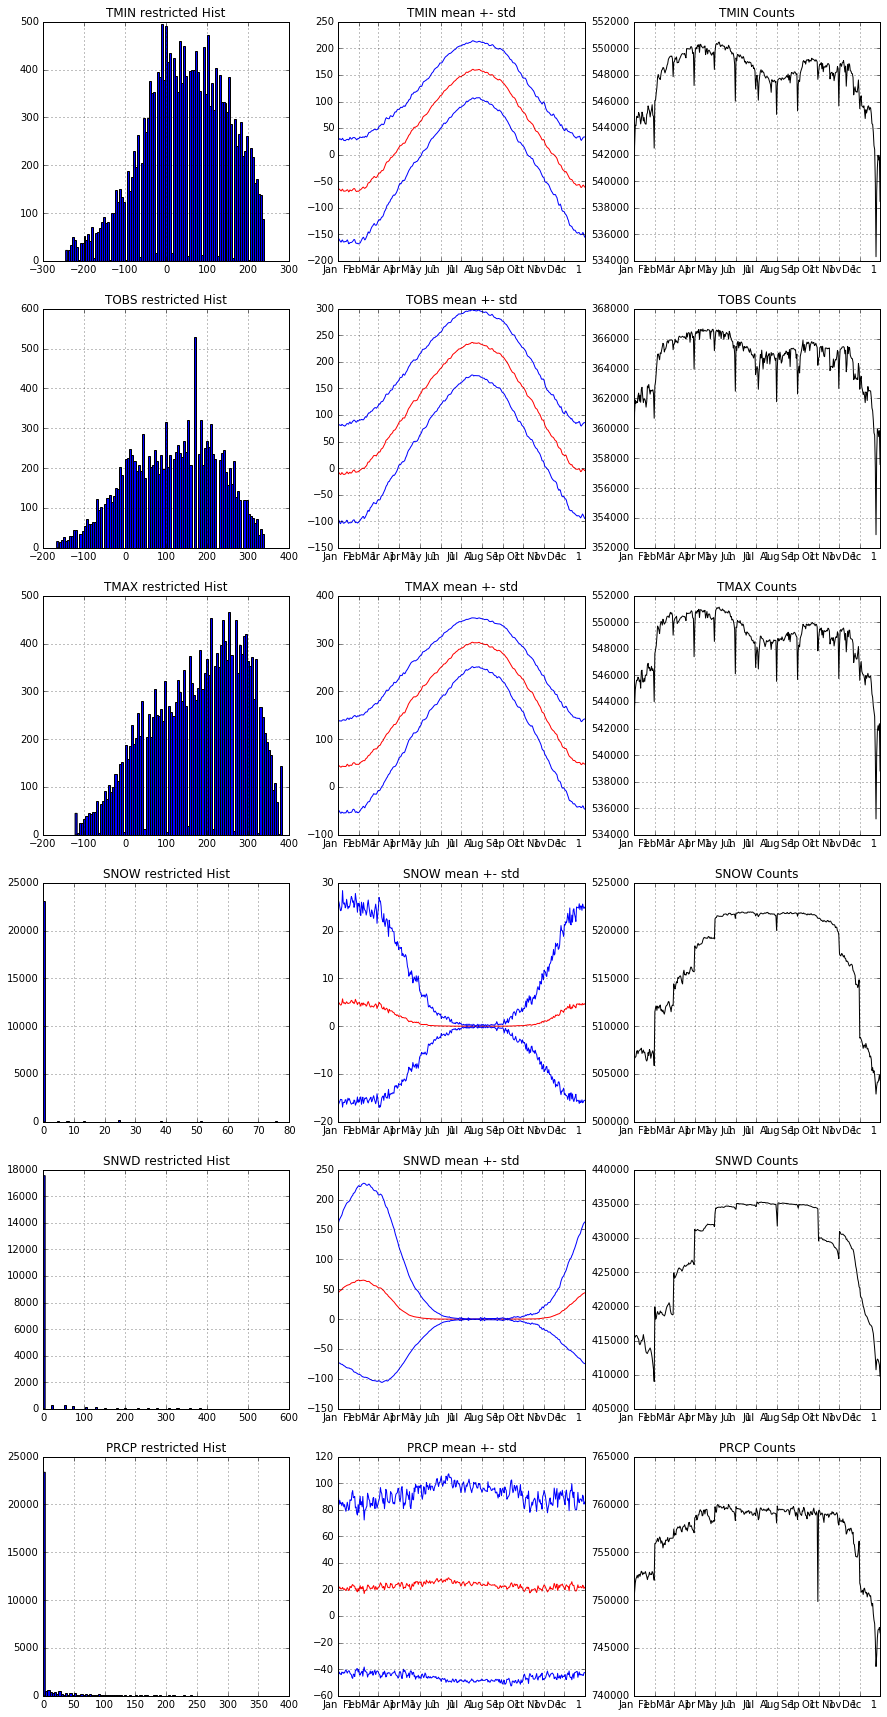

In [27]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    vals = STAT[meas]['SortedVals']
    low = STAT[meas]['low100']
    high = STAT[meas]['high100']
    vals = vals[vals>=low]
    vals = vals[vals<=high]
    fig=figure(1,figsize=size,dpi=300)
    hist(vals, bins=100)
    grid()
    title(meas + ' restricted Hist')
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'], c='r')
    YearlyPlots(STAT[meas]['Mean']+numpy.sqrt(STAT[meas]['Var']), c='b')
    YearlyPlots(STAT[meas]['Mean']-numpy.sqrt(STAT[meas]['Var']), ttl=meas + " mean +- std", c='b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'], ttl=meas + " Counts", c='k')

### Plot the Number of measurements recorded each day for TMAX

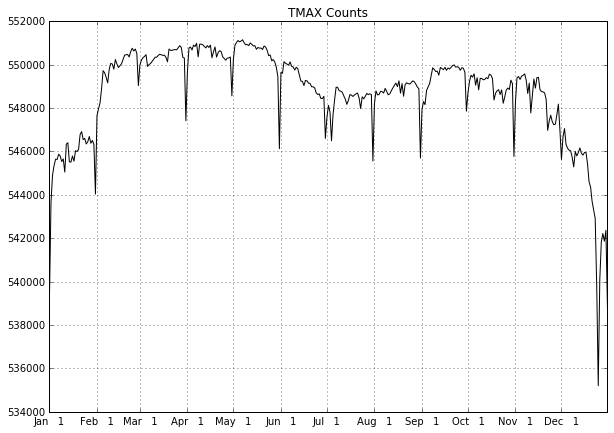

In [28]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'], ttl='TMAX Counts', c='k')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


* The reason for the lower counts is that there is a long holiday at the end of the year through the beginning of the next year. Besides, at the end of every month, the machines may be turned off for maintenance.
  To remove this effect, we can filter out rows with NaNs. In the full dataset, there are originally 662767 records. After filtering out NaNs, there are 290434 valid records. So about 56% of the stations turn off the meters and the remaining stations keep meters on throughout the year.
* The counts per day for "SNWD" are high in the middle of the year because the temperature is relatively high from MAY to October, which means it rarely snows during this period. Therefore, maybe the records are kept by hand (just set the values to zeros).

### Instructor Feedback

The explanation given in the first bullet is not supported by evidence. The method for removing the effect is very crude - your are removing any station-year that does not have a full set of measurements. Nothing related to end-of-month specifically. and removes 56% of the data. 

It is not clear to me what the figures below are meant to represent or explain.

No extra credit points.

In [5]:
import pandas as pd
Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))

FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df

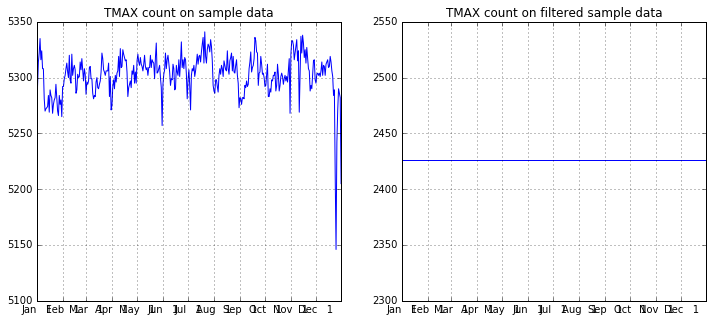

In [14]:
tmax_df = m_df['TMAX']
figure(figsize=(12,5))
subplot(1,2,1)
YearlyPlots(tmax_df.count()[3:], ttl="TMAX count on sample data")
subplot(1,2,2)
YearlyPlots(tmax_df[np.isnan(tmax_df[range(1,366)]).sum(axis=1)<1].count()[3:], ttl="TMAX count on filtered sample data")

In [24]:
snwd_df = m_df['SNWD']
print snwd_df[range(180,300)]

       180  181  182  183  184  185  186  187  188  189 ...   290  291  292  \
10     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
11       0  NaN    0    0    0    0    0    0    0    0 ...     0    0    0   
12     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
13     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
25     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
34     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
35     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
36     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
46     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
47     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
48     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
55     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

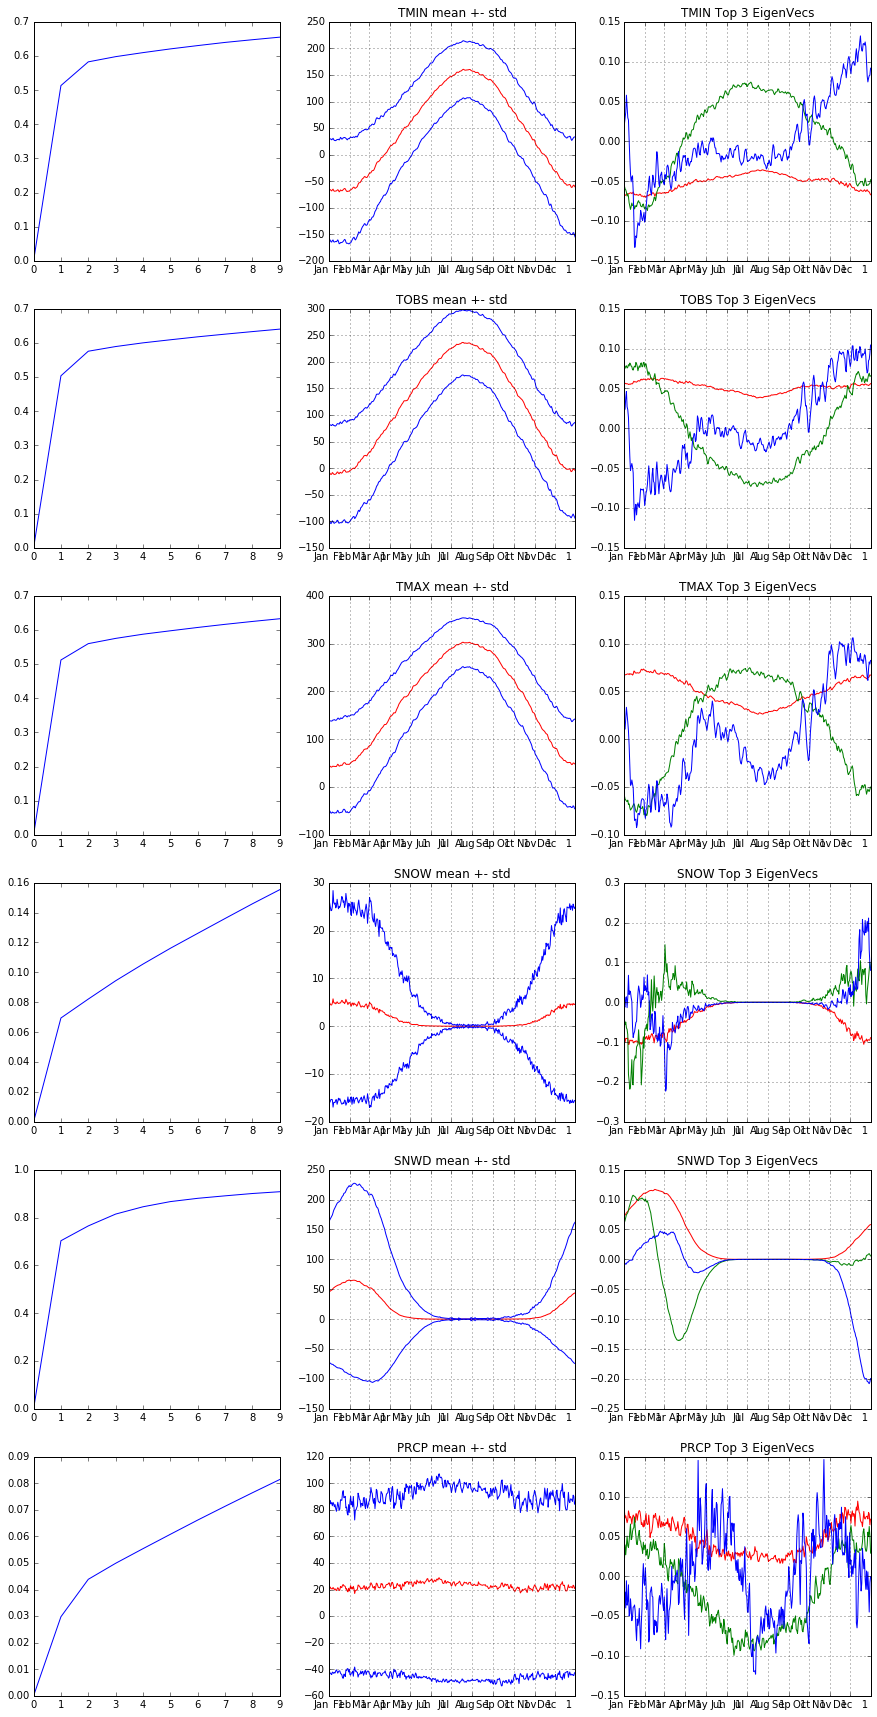

In [29]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    plot(range(10), [0]+list(numpy.cumsum(STAT[meas]['eigval'][:9]/numpy.sum(STAT[meas]['eigval']))))
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'], c='r')
    YearlyPlots(STAT[meas]['Mean']+numpy.sqrt(STAT[meas]['Var']), c='b')
    YearlyPlots(STAT[meas]['Mean']-numpy.sqrt(STAT[meas]['Var']), ttl=meas + ' mean +- std', c='b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    YearlyPlots(STAT[meas]['eigvec'][: , 0], c='r')
    YearlyPlots(STAT[meas]['eigvec'][: , 1], c='g')
    YearlyPlots(STAT[meas]['eigvec'][: , 2], ttl=meas + ' Top 3 EigenVecs', c='b')